In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('../ML_Work/Datasets/Stroke-Prediction/healthcare-dataset-stroke-data.csv')

In [3]:
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
data.shape

(5110, 12)

In [6]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [4]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=2)

In [9]:
train_data.shape

(4088, 12)

In [10]:
test_data.shape

(1022, 12)

In [11]:
test_data.shape[0]/data.shape[0] * 100

20.0

In [5]:
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=2)

In [6]:
train_data.shape

(3270, 12)

In [14]:
val_data.shape

(818, 12)

In [32]:
train_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,3270.000000,3270.000000,3270.000000,3270.000000,3270.000000,3144.000000,3270.000000
mean,36340.741284,43.287768,0.095719,0.055657,105.650875,28.902958,0.048012
std,21077.752623,22.553502,0.294250,0.229294,45.129827,7.869685,0.213825
min,67.000000,0.080000,0.000000,0.000000,55.120000,11.300000,0.000000
25%,17959.000000,25.000000,0.000000,0.000000,77.045000,23.700000,0.000000
50%,36606.500000,45.000000,0.000000,0.000000,91.585000,28.100000,0.000000
75%,54518.750000,61.000000,0.000000,0.000000,113.010000,32.900000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,267.760000,97.600000,1.000000


In [15]:
train_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  126
smoking_status         0
stroke                 0
dtype: int64

In [16]:
val_data.isnull().sum()

id                    0
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  32
smoking_status        0
stroke                0
dtype: int64

In [17]:
train_data.nunique()

id                   3270
gender                  2
age                   103
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    2771
bmi                   393
smoking_status          4
stroke                  2
dtype: int64

In [40]:
numeric_train_data = train_data.select_dtypes(exclude=['object'])
numeric_train_data.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')

In [45]:
def normalize(col):
    return (col - col.mean())/col.std()

In [47]:
custom_norm_numeric_train_data = pd.DataFrame()

In [48]:
for col in ['id', 'age', 'avg_glucose_level', 'bmi']:
    custom_norm_numeric_train_data[col] = normalize(numeric_train_data[col])

for col in ['hypertension','heart_disease', 'stroke']:
    custom_norm_numeric_train_data[col] = numeric_train_data[col]

In [49]:
custom_norm_numeric_train_data.describe()

,id,age,avg_glucose_level,bmi,hypertension,heart_disease,stroke
count,3.270000e+03,3.270000e+03,3.270000e+03,3.144000e+03,3270.000000,3270.000000,3270.000000
mean,1.533941e-16,-8.275406e-16,-4.094983e-15,-2.093321e-15,0.095719,0.055657,0.048012
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.294250,0.229294,0.213825
min,-1.720949e+00,-1.915790e+00,-1.119678e+00,-2.236806e+00,0.000000,0.000000,0.000000
25%,-8.720921e-01,-8.108616e-01,-6.338574e-01,-6.611393e-01,0.000000,0.000000,0.000000
50%,1.260849e-02,7.591869e-02,-3.116758e-01,-1.020318e-01,0.000000,0.000000,0.000000
75%,8.624263e-01,7.853429e-01,1.630657e-01,5.079037e-01,0.000000,0.000000,0.000000
max,1.736393e+00,1.716462e+00,3.592062e+00,8.729326e+00,1.000000,1.000000,1.000000


<AxesSubplot:>

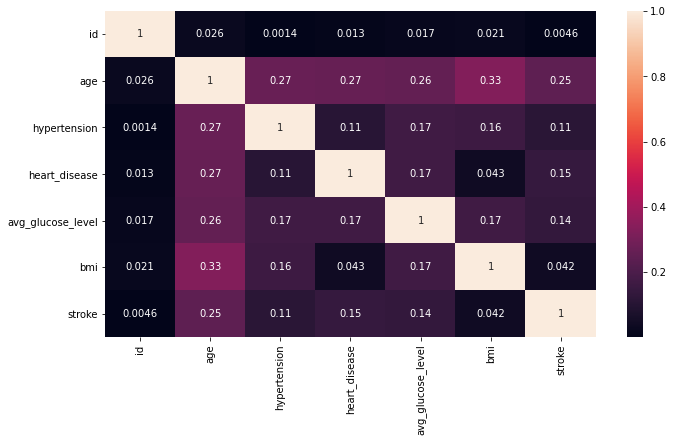

In [38]:
train_corr = train_data.corr()
fig, ax = plt.subplots(figsize=(11,6))
sns.heatmap(train_corr, annot=True, ax=ax)

In [52]:
train_data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

<AxesSubplot:xlabel='bmi', ylabel='avg_glucose_level'>

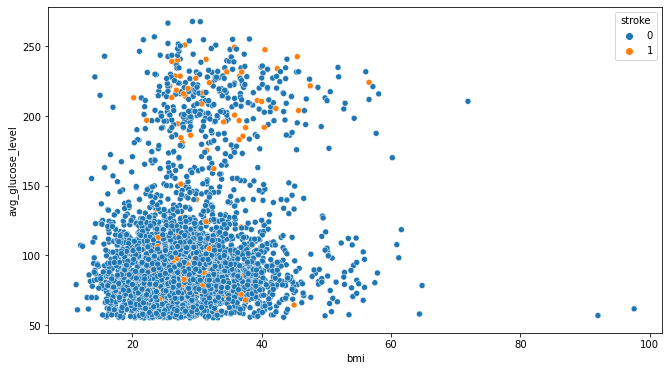

In [8]:
fig, ax = plt.subplots(figsize=(11,6))
sns.scatterplot(x='bmi', y='avg_glucose_level', data=train_data, hue='stroke', ax=ax)

By observing the above scatter plot, we can say that if avg_glucose_level is below 150 or bmi is above 50, there are less chances of having stroke

<AxesSubplot:xlabel='age', ylabel='bmi'>

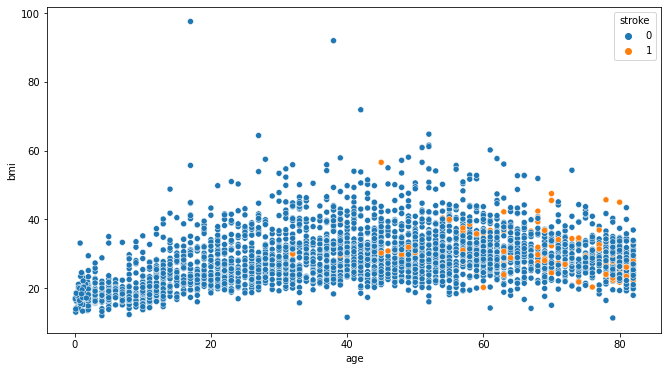

In [11]:
_,axis = plt.subplots(figsize=(11,6))
sns.scatterplot(x='age', y='bmi', data=train_data, hue='stroke', ax=axis)

Till age of almost 40 whatever the bmi a person has, there is rare possibility for him/her to have stroke. Between age of 40 to 80 and having bmi less than 50, a person has some chances of getting stroke

In [16]:
def get_axis():
    _, axis = plt.subplots(figsize=(11,6))
    return axis

<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>

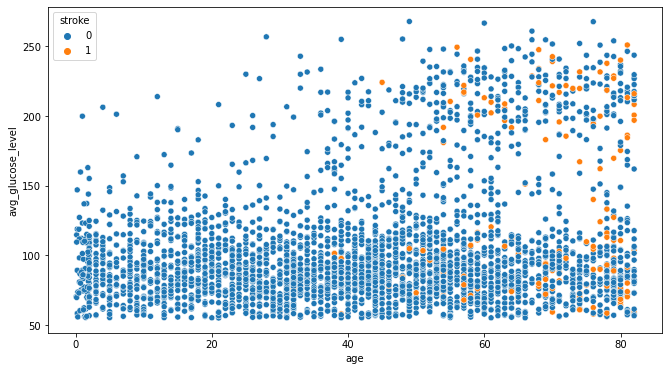

In [18]:
sns.scatterplot(x='age', y='avg_glucose_level', data=train_data, hue='stroke', ax=get_axis())

For age<50 or (50<=age<=70 and 120<avg_glucose_level<170), there are less chances of getting stroke but there are some higher chances of getting stroke in other scenarios.